<a href="https://colab.research.google.com/github/paulopetrillo/PROJETO_IFMA_SOFTEX/blob/main/PROJETO_IFMA_SOFTEX_ONE_HOT_ENC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importa a biblioteca numpy
import numpy as np
print(np.__version__)

1.23.5


In [2]:
# importa biblioteca Pandas.
import pandas as pd
print(pd.__version__)

1.5.3


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importa biblioteca estatística.
import scipy.stats as stats
# Performing normaltest
from scipy.stats import normaltest
import pylab as p

In [5]:
# Conect (mount) Dataframe do google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Importa Dataframe do google Drive
DataFrame_Geral= pd.read_csv("./drive/MyDrive/DataFrame_Geral.csv", header=0)

In [7]:
# Visualiza dados.
DataFrame_Geral.info()
DataFrame_Geral.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540 entries, 0 to 2539
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   2540 non-null   int64 
 1   mandante                     2540 non-null   object
 2   golsMand                     2540 non-null   int64 
 3   golsVist                     2540 non-null   int64 
 4   vistante                     2540 non-null   object
 5   poder_ataque_time_mandante   2540 non-null   int64 
 6   poder_ataque_time_visitante  2540 non-null   int64 
 7   poder_defesa_time_mandante   2540 non-null   int64 
 8   poder_defesa_time_visitante  2540 non-null   int64 
 9   classe_resultado             2540 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 198.6+ KB


,Unnamed: 0,mandante,golsMand,golsVist,vistante,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado
0,116,Atlético,4,3,São Paulo,9,6,8,5,1
1,117,Atlético,2,0,Santos,12,0,7,4,1
2,123,Sport,0,0,Atlético,6,11,9,12,0
3,130,Palmeiras,0,1,Internacional,8,5,5,4,2
4,131,Atlético,1,2,Botafogo,14,7,6,6,2


In [8]:
# Verificando times.
DataFrame_Geral.mandante.unique()

array(['Atlético', 'Sport', 'Palmeiras', 'Portuguesa', 'Vasco da Gama',
       'Grêmio', 'Coritiba', 'São Paulo', 'Cruzeiro', 'Náutico',
       'Flamengo', 'Internacional', 'Bahia', 'Corinthians', 'Santos',
       'Figueirense', 'Botafogo', 'Fluminense', 'Ponte Preta', 'Criciuma',
       'Vitória', 'Goiás', 'Atlético Paranaense', 'Atletico',
       'Chapecoense', 'Joinville', 'Avaí', 'Coritiba - PR',
       'Santa Cruz - PE', 'Internacional - RS', 'Chapecoense - SC',
       'Ponte Preta - SP', 'Flamengo - RJ', 'Grêmio - RS',
       'São Paulo - SP', 'Vitória - BA', 'Cruzeiro - MG',
       'Palmeiras - SP', 'Botafogo - RJ', 'Santos - SP', 'América - MG',
       'Fluminense - RJ', 'Corinthians - SP', 'Atlético - PR',
       'Figueirense - SC', 'Sport - PE', 'Atlético - MG',
       'Vasco da Gama - RJ', 'Atlético - GO', 'Bahia - BA', 'Avaí - SC',
       'America Fc - MG', 'Paraná - PR', 'Ceará - CE',
       'Athletico Paranaense - PR', 'Csa - AL', 'Goiás - GO',
       'Fortaleza - CE', 'R

In [9]:
# Uniformiza os valores (nomes) dos times na feature mandante.
DataFrame_Geral['mandante'] = DataFrame_Geral['mandante'].replace(['Atlético Paranaense','Atletico','Atlético','Sport','Palmeiras','Portuguesa','Vasco da Gama','Grêmio','Coritiba','São Paulo','Cruzeiro','Náutico','Flamengo','Internacional','Bahia','Corinthians','Santos','Figueirense','Botafogo','Fluminense','Ponte Preta','Criciuma','Vitória','Goiás'],
                                                                  ['Athletico Paranaense - PR','Atlético - GO','Atlético Mineiro - MG','Sport - PE','Palmeiras - SP','Portuguesa - SP','Vasco da Gama - RJ','Grêmio - RS','Coritiba - PR','São Paulo - SP','Cruzeiro - MG','Náutico - PE','Flamengo - RJ', 'Internacional - RS','Bahia - BA','Corinthians - SP','Santos - SP','Figueirense - SC','Botafogo - RJ','Fluminense - RJ','Ponte Preta - SP','Criciuma - SC','Vitória - BA','Goiás - GO'])

In [10]:
# Verificando times mandantes.
DataFrame_Geral.mandante.unique()

array(['Atlético Mineiro - MG', 'Sport - PE', 'Palmeiras - SP',
       'Portuguesa - SP', 'Vasco da Gama - RJ', 'Grêmio - RS',
       'Coritiba - PR', 'São Paulo - SP', 'Cruzeiro - MG', 'Náutico - PE',
       'Flamengo - RJ', 'Internacional - RS', 'Bahia - BA',
       'Corinthians - SP', 'Santos - SP', 'Figueirense - SC',
       'Botafogo - RJ', 'Fluminense - RJ', 'Ponte Preta - SP',
       'Criciuma - SC', 'Vitória - BA', 'Goiás - GO',
       'Athletico Paranaense - PR', 'Atlético - GO', 'Chapecoense',
       'Joinville', 'Avaí', 'Santa Cruz - PE', 'Chapecoense - SC',
       'América - MG', 'Atlético - PR', 'Atlético - MG', 'Avaí - SC',
       'America Fc - MG', 'Paraná - PR', 'Ceará - CE', 'Csa - AL',
       'Fortaleza - CE', 'Red Bull Bragantino - SP', 'America - MG',
       'Juventude - RS', 'Cuiabá - MT'], dtype=object)

In [11]:
# Uniformiza os valores (nomes) dos times na feature vistante.
DataFrame_Geral['vistante'] = DataFrame_Geral['vistante'].replace(['Atlético Paranaense','Atletico','Atlético','Sport','Palmeiras','Portuguesa','Vasco da Gama','Grêmio','Coritiba','São Paulo','Cruzeiro','Náutico','Flamengo','Internacional','Bahia','Corinthians','Santos','Figueirense','Botafogo','Fluminense','Ponte Preta','Criciuma','Vitória','Goiás'],
                                                                  ['Athletico Paranaense - PR','Atlético - GO','Atlético Mineiro - MG','Sport - PE','Palmeiras - SP','Portuguesa - SP','Vasco da Gama - RJ','Grêmio - RS','Coritiba - PR','São Paulo - SP','Cruzeiro - MG','Náutico - PE','Flamengo - RJ', 'Internacional - RS','Bahia - BA','Corinthians - SP','Santos - SP','Figueirense - SC','Botafogo - RJ','Fluminense - RJ','Ponte Preta - SP','Criciuma - SC','Vitória - BA','Goiás - GO'])

In [12]:
# Verificando times mandantes.
DataFrame_Geral.vistante.unique()

array(['São Paulo - SP', 'Santos - SP', 'Atlético Mineiro - MG',
       'Internacional - RS', 'Botafogo - RJ', 'Figueirense - SC',
       'Corinthians - SP', 'Bahia - BA', 'Fluminense - RJ', 'Sport - PE',
       'Ponte Preta - SP', 'Vasco da Gama - RJ', 'Náutico - PE',
       'Portuguesa - SP', 'Cruzeiro - MG', 'Flamengo - RJ',
       'Palmeiras - SP', 'Coritiba - PR', 'Grêmio - RS',
       'Athletico Paranaense - PR', 'Vitória - BA', 'Goiás - GO',
       'Criciuma - SC', 'Chapecoense', 'Atlético - GO', 'Avaí',
       'Joinville', 'Atlético - PR', 'Atlético - MG', 'América - MG',
       'Santa Cruz - PE', 'Chapecoense - SC', 'Avaí - SC',
       'America Fc - MG', 'Ceará - CE', 'Paraná - PR', 'Fortaleza - CE',
       'Csa - AL', 'Red Bull Bragantino - SP', 'Cuiabá - MT',
       'America - MG', 'Juventude - RS'], dtype=object)

In [13]:
# Verifica distribuição dos resultados (Vitória apresenta mais dados - necessidade de balancear os dados).
DataFrame_Geral['classe_resultado'].value_counts()

1    1258
0     674
2     608
Name: classe_resultado, dtype: int64

In [14]:
# Array com variáveis que serão Dummy's
#array_times = ['mandante', 'vistante']
array_result = ['classe_resultado']

# transformação das variáveis em Dummy e incorporação no dataframe.
for resultado in array_result:
  lista_result = 'result' + '_' + resultado
  lista_result = pd.get_dummies(DataFrame_Geral[resultado], prefix=resultado)
  DataFrame_Geral_Catgor_result = DataFrame_Geral.join(lista_result)
  DataFrame_Geral = DataFrame_Geral_Catgor_result

In [15]:
# Verifica resultados
DataFrame_Geral.columns

Index(['Unnamed: 0', 'mandante', 'golsMand', 'golsVist', 'vistante',
       'poder_ataque_time_mandante', 'poder_ataque_time_visitante',
       'poder_defesa_time_mandante', 'poder_defesa_time_visitante',
       'classe_resultado', 'classe_resultado_0', 'classe_resultado_1',
       'classe_resultado_2'],
      dtype='object')

In [16]:
DataFrame_Geral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540 entries, 0 to 2539
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   2540 non-null   int64 
 1   mandante                     2540 non-null   object
 2   golsMand                     2540 non-null   int64 
 3   golsVist                     2540 non-null   int64 
 4   vistante                     2540 non-null   object
 5   poder_ataque_time_mandante   2540 non-null   int64 
 6   poder_ataque_time_visitante  2540 non-null   int64 
 7   poder_defesa_time_mandante   2540 non-null   int64 
 8   poder_defesa_time_visitante  2540 non-null   int64 
 9   classe_resultado             2540 non-null   int64 
 10  classe_resultado_0           2540 non-null   uint8 
 11  classe_resultado_1           2540 non-null   uint8 
 12  classe_resultado_2           2540 non-null   uint8 
dtypes: int64(8), object(2), uint8(3)


In [17]:
DataFrame_Geral.head()

,Unnamed: 0,mandante,golsMand,golsVist,vistante,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado,classe_resultado_0,classe_resultado_1,classe_resultado_2
0,116,Atlético Mineiro - MG,4,3,São Paulo - SP,9,6,8,5,1,0,1,0
1,117,Atlético Mineiro - MG,2,0,Santos - SP,12,0,7,4,1,0,1,0
2,123,Sport - PE,0,0,Atlético Mineiro - MG,6,11,9,12,0,1,0,0
3,130,Palmeiras - SP,0,1,Internacional - RS,8,5,5,4,2,0,0,1
4,131,Atlético Mineiro - MG,1,2,Botafogo - RJ,14,7,6,6,2,0,0,1


In [19]:
# Correlação de Pearson
DataFrame_Geral.corr(method='pearson')

<ipython-input-19-a2c7d4a40ef3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DataFrame_Geral.corr(method='pearson')


,Unnamed: 0,golsMand,golsVist,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado,classe_resultado_0,classe_resultado_1,classe_resultado_2
Unnamed: 0,1.000000,0.030476,-0.003200,0.040242,-0.052077,-0.055213,0.054469,-0.006984,-0.010686,0.028791,-0.022678
golsMand,0.030476,1.000000,0.010075,0.154635,-0.055448,-0.086245,0.084019,-0.082528,-0.292570,0.633915,-0.440047
golsVist,-0.003200,0.010075,1.000000,-0.027594,0.132682,0.067376,-0.075541,0.391926,-0.042315,-0.481795,0.608321
poder_ataque_time_mandante,0.040242,0.154635,-0.027594,1.000000,-0.024310,-0.104565,-0.001155,-0.037635,-0.024220,0.096219,-0.087681
poder_ataque_time_visitante,-0.052077,-0.055448,0.132682,-0.024310,1.000000,0.033432,-0.066512,0.008697,0.051262,-0.102887,0.067513
poder_defesa_time_mandante,-0.055213,-0.086245,0.067376,-0.104565,0.033432,1.000000,0.003122,0.039689,0.021539,-0.094399,0.088323
poder_defesa_time_visitante,0.054469,0.084019,-0.075541,-0.001155,-0.066512,0.003122,1.000000,0.002494,-0.049093,0.083165,-0.046649
classe_resultado,-0.006984,-0.082528,0.391926,-0.037635,0.008697,0.039689,0.002494,1.000000,-0.824525,0.036255,0.810686
classe_resultado_0,-0.010686,-0.292570,-0.042315,-0.024220,0.051262,0.021539,-0.049093,-0.824525,1.000000,-0.595347,-0.337149
classe_resultado_1,0.028791,0.633915,-0.481795,0.096219,-0.102887,-0.094399,0.083165,0.036255,-0.595347,1.000000,-0.555705


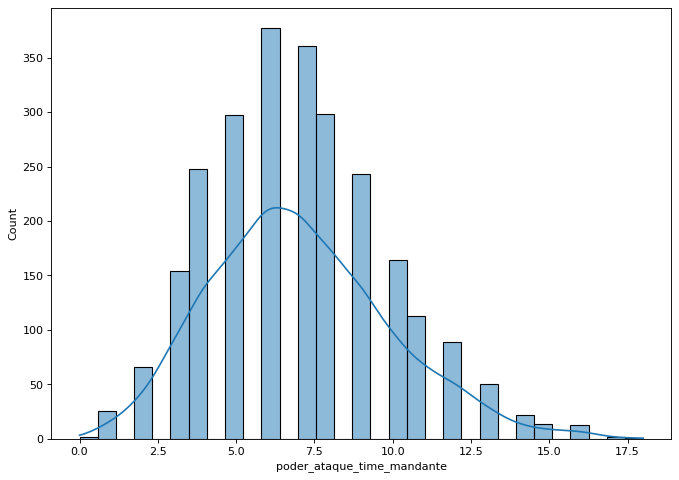

In [ ]:
# Verificando se a distribuição é Normal
plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(DataFrame_Geral['poder_ataque_time_mandante'], kde=True)
plt.show()

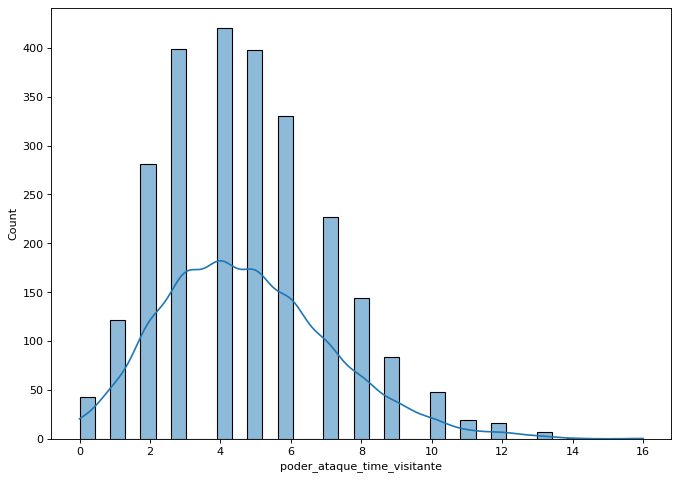

In [ ]:
# Verificando se a distribuição é Normal
plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(DataFrame_Geral['poder_ataque_time_visitante'], kde=True)
plt.show()

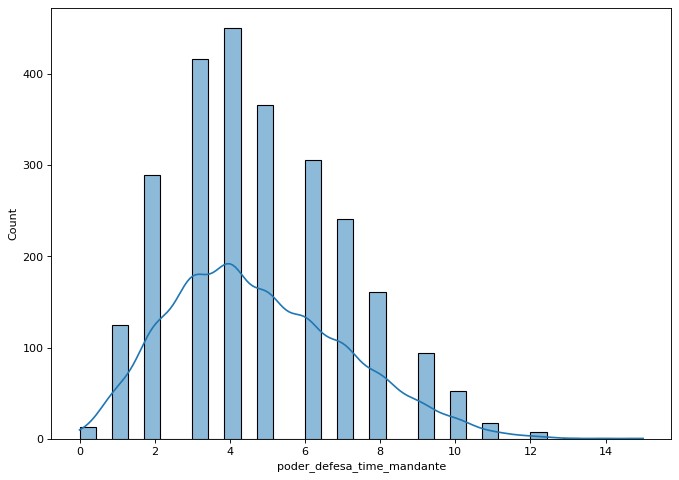

In [ ]:
# Verificando se a distribuição é Normal
plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(DataFrame_Geral['poder_defesa_time_mandante'], kde=True)
plt.show()

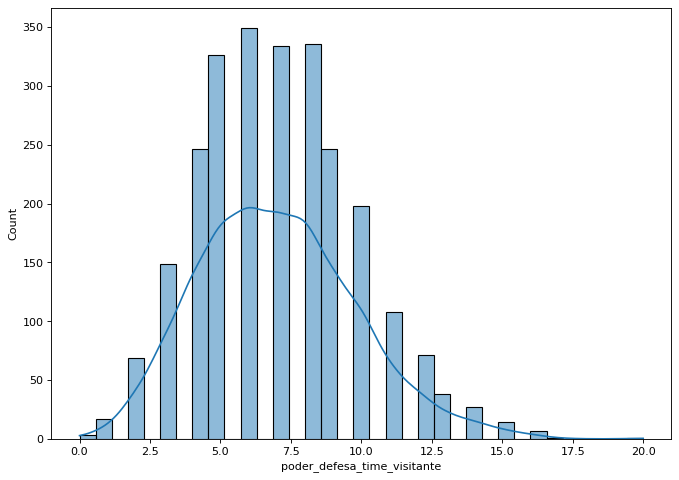

In [ ]:
# Verificando se a distribuição é Normal
plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(DataFrame_Geral['poder_defesa_time_visitante'], kde=True)
plt.show()

In [ ]:
# teste de normaliadade para verificar aplicação de testes paramétricos.
alpha = 0.05
k2, p = normaltest(DataFrame_Geral['poder_ataque_time_mandante'])
#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal
if p < alpha:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")
print('Valoir de p é ', p)
# p-valor: Pode também ser citado como valor-p. É a probabilidade de se obter um
# efeito tão extremo quanto o que está ocorrendo em nossos dados, assumindo que a
# hipótese nula é verdadeira. (Qual a probabilidade da distribuição que observamos
# naquele histograma ocorrer? Este é o p-valor).

# alpha: É o nível de significância, isto é, a probabilidade de rejeitarmos a
# hipótese nula quando ela é verdadeira. (Neste caso, a probabilidade de concluirmos
# que os dados não seguem a distribuição normal, quando na verdade seguem).

# k2: Este valor é, na verdade, a soma de dois termos elevados ao quadrado: s² + k².
# Sendo s o valor z obtido através do teste de assimetria (skewtest) e k é o valor
# da estatística z obtido pelo teste de curtose.

A Hipótese Nula pode ser rejeitada
Valoir de p é  1.104785057160081e-19


In [ ]:
# teste de normaliadade para verificar aplicação de testes paramétricos.
alpha = 0.05
k2, p = normaltest(DataFrame_Geral['poder_ataque_time_visitante'])
#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal
if p < alpha:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")
print('Valoir de p é ', p)

A Hipótese Nula pode ser rejeitada
Valoir de p é  4.138979716819011e-29


In [ ]:
# teste de normaliadade para verificar aplicação de testes paramétricos.
alpha = 0.05
k2, p = normaltest(DataFrame_Geral['poder_defesa_time_mandante'])
#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal
if p < alpha:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")
print('Valoir de p é ', p)

A Hipótese Nula pode ser rejeitada
Valoir de p é  6.168907502818448e-23


In [ ]:
# teste de normaliadade para verificar aplicação de testes paramétricos.
alpha = 0.05
k2, p = normaltest(DataFrame_Geral['poder_defesa_time_visitante'])
#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal
if p < alpha:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")
print('Valoir de p é ', p)

A Hipótese Nula pode ser rejeitada
Valoir de p é  1.4227526574175605e-16


In [20]:
# Correlação de Spearman
DataFrame_Geral.corr(method='spearman')

<ipython-input-20-6e9f278a83c5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DataFrame_Geral.corr(method='spearman')


,Unnamed: 0,golsMand,golsVist,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado,classe_resultado_0,classe_resultado_1,classe_resultado_2
Unnamed: 0,1.000000,0.032372,-0.003105,0.042769,-0.064551,-0.061384,0.051045,-0.006596,-0.010737,0.028836,-0.022678
golsMand,0.032372,1.000000,0.006982,0.147462,-0.041151,-0.089728,0.083729,-0.096208,-0.294211,0.667917,-0.478190
golsVist,-0.003105,0.006982,1.000000,-0.015512,0.108541,0.058159,-0.078784,0.347975,-0.002025,-0.499481,0.587354
poder_ataque_time_mandante,0.042769,0.147462,-0.015512,1.000000,-0.027313,-0.096249,0.000798,-0.033920,-0.024003,0.092186,-0.083181
poder_ataque_time_visitante,-0.064551,-0.041151,0.108541,-0.027313,1.000000,0.027624,-0.058258,-0.002644,0.055176,-0.095349,0.054632
poder_defesa_time_mandante,-0.061384,-0.089728,0.058159,-0.096249,0.027624,1.000000,-0.005736,0.037589,0.025892,-0.100887,0.091421
poder_defesa_time_visitante,0.051045,0.083729,-0.078784,0.000798,-0.058258,-0.005736,1.000000,-0.000264,-0.046999,0.084857,-0.050799
classe_resultado,-0.006596,-0.096208,0.347975,-0.033920,-0.002644,0.037589,-0.000264,1.000000,-0.831379,0.048468,0.803468
classe_resultado_0,-0.010737,-0.294211,-0.002025,-0.024003,0.055176,0.025892,-0.046999,-0.831379,1.000000,-0.595347,-0.337149
classe_resultado_1,0.028836,0.667917,-0.499481,0.092186,-0.095349,-0.100887,0.084857,0.048468,-0.595347,1.000000,-0.555705


In [21]:
# Correlação de Kendall_tau
DataFrame_Geral.corr(method='kendall')
# é melhor urtilizar o médoto de Kendall tau, pois o método de Spearma pressupõe dados contínuos.
# Em kendall tau a correlação é mais fraca do que no método de Spearman.

<ipython-input-21-5cd75daed596>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DataFrame_Geral.corr(method='kendall')


,Unnamed: 0,golsMand,golsVist,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado,classe_resultado_0,classe_resultado_1,classe_resultado_2
Unnamed: 0,1.000000,0.024141,-0.002336,0.029733,-0.045606,-0.044176,0.035248,-0.005136,-0.008784,0.023590,-0.018553
golsMand,0.024141,1.000000,0.005851,0.114913,-0.032402,-0.070638,0.065738,-0.072900,-0.267995,0.608401,-0.435580
golsVist,-0.002336,0.005851,1.000000,-0.012296,0.087489,0.046683,-0.062999,0.297445,-0.001890,-0.466097,0.548097
poder_ataque_time_mandante,0.029733,0.114913,-0.012296,1.000000,-0.019982,-0.071606,0.000465,-0.027813,-0.020544,0.078902,-0.071194
poder_ataque_time_visitante,-0.045606,-0.032402,0.087489,-0.019982,1.000000,0.020938,-0.042881,-0.002481,0.047646,-0.082337,0.047176
poder_defesa_time_mandante,-0.044176,-0.070638,0.046683,-0.071606,0.020938,1.000000,-0.004195,0.030133,0.022386,-0.087227,0.079043
poder_defesa_time_visitante,0.035248,0.065738,-0.062999,0.000465,-0.042881,-0.004195,1.000000,-0.000322,-0.040257,0.072685,-0.043512
classe_resultado,-0.005136,-0.072900,0.297445,-0.027813,-0.002481,0.030133,-0.000322,1.000000,-0.788563,0.045972,0.762089
classe_resultado_0,-0.008784,-0.267995,-0.001890,-0.020544,0.047646,0.022386,-0.040257,-0.788563,1.000000,-0.595347,-0.337149
classe_resultado_1,0.023590,0.608401,-0.466097,0.078902,-0.082337,-0.087227,0.072685,0.045972,-0.595347,1.000000,-0.555705


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:181: UserWarning: The label '_nolegend_' of <matplotlib.patches.Patch object at 0x7a70ccf45e40> starts with '_'. It is thus excluded from the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


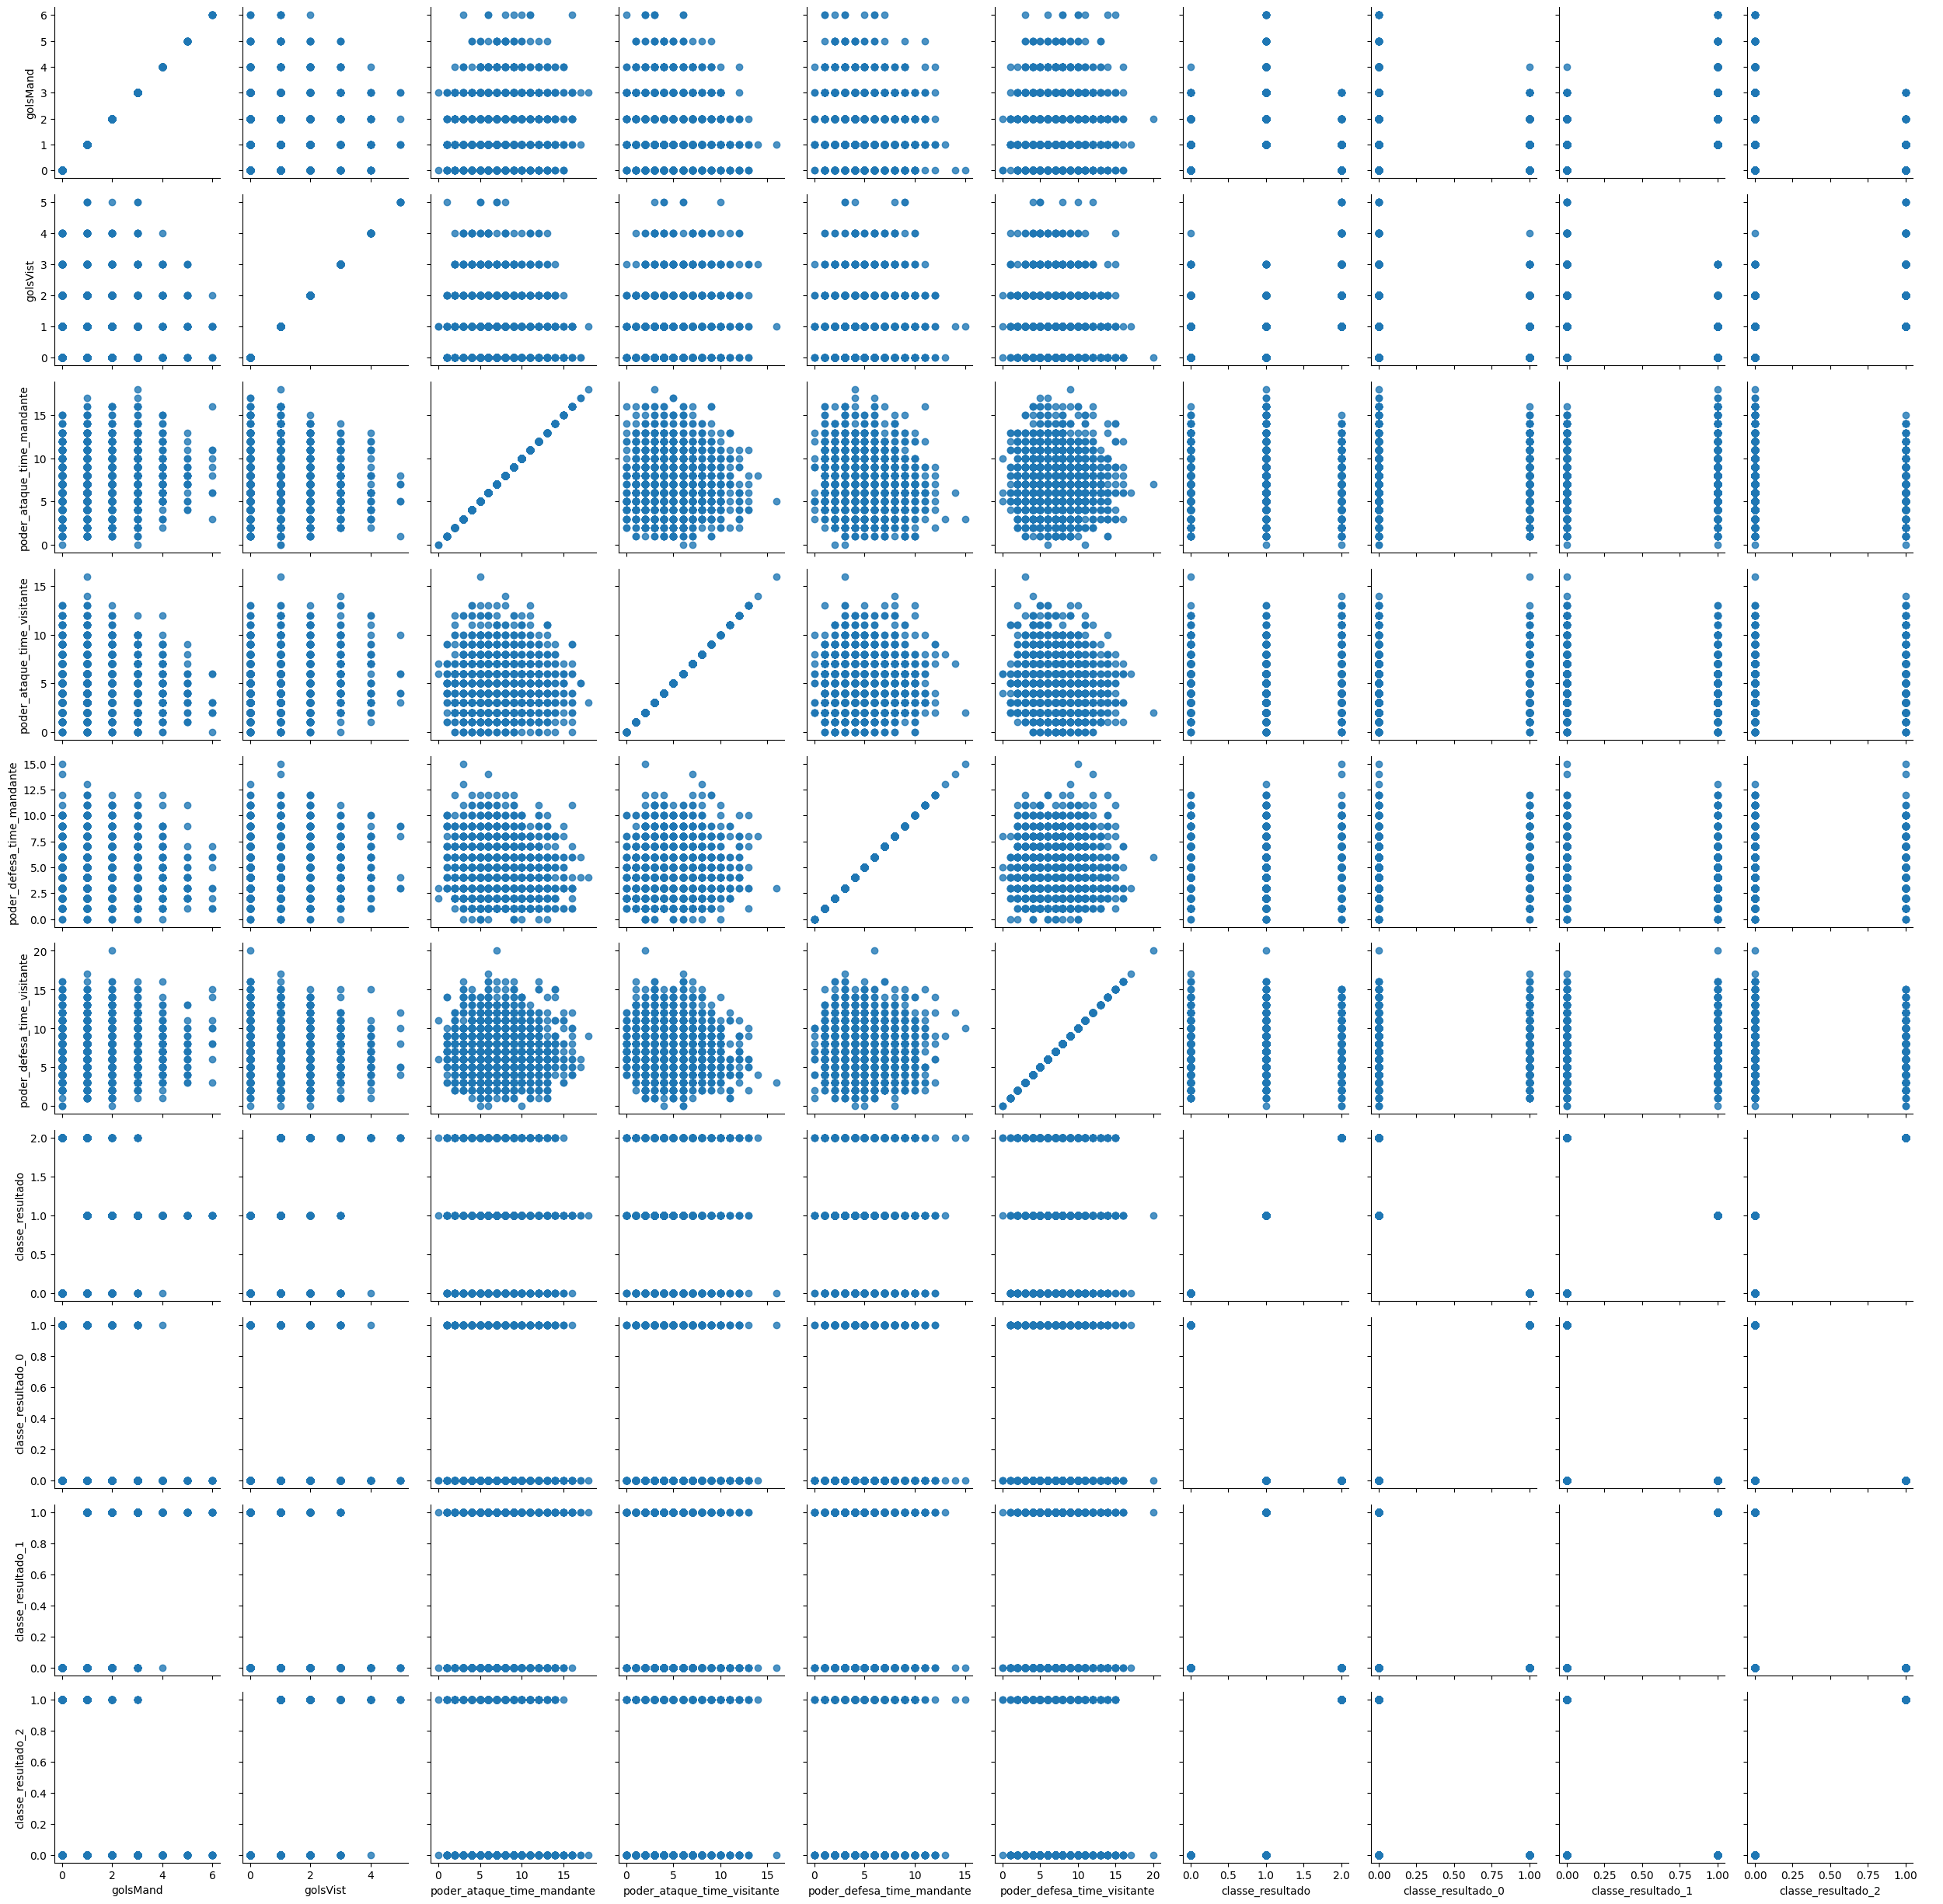

In [ ]:
# scatter plot
g = sns.PairGrid(DataFrame_Geral, vars=['golsMand', 'golsVist', 'poder_ataque_time_mandante', 'poder_ataque_time_visitante',
                                        'poder_defesa_time_mandante',	'poder_defesa_time_visitante',	'classe_resultado',
                                        'classe_resultado_0',	'classe_resultado_1',	'classe_resultado_2'])
g.map(plt.scatter, alpha=0.8)
g.add_legend();

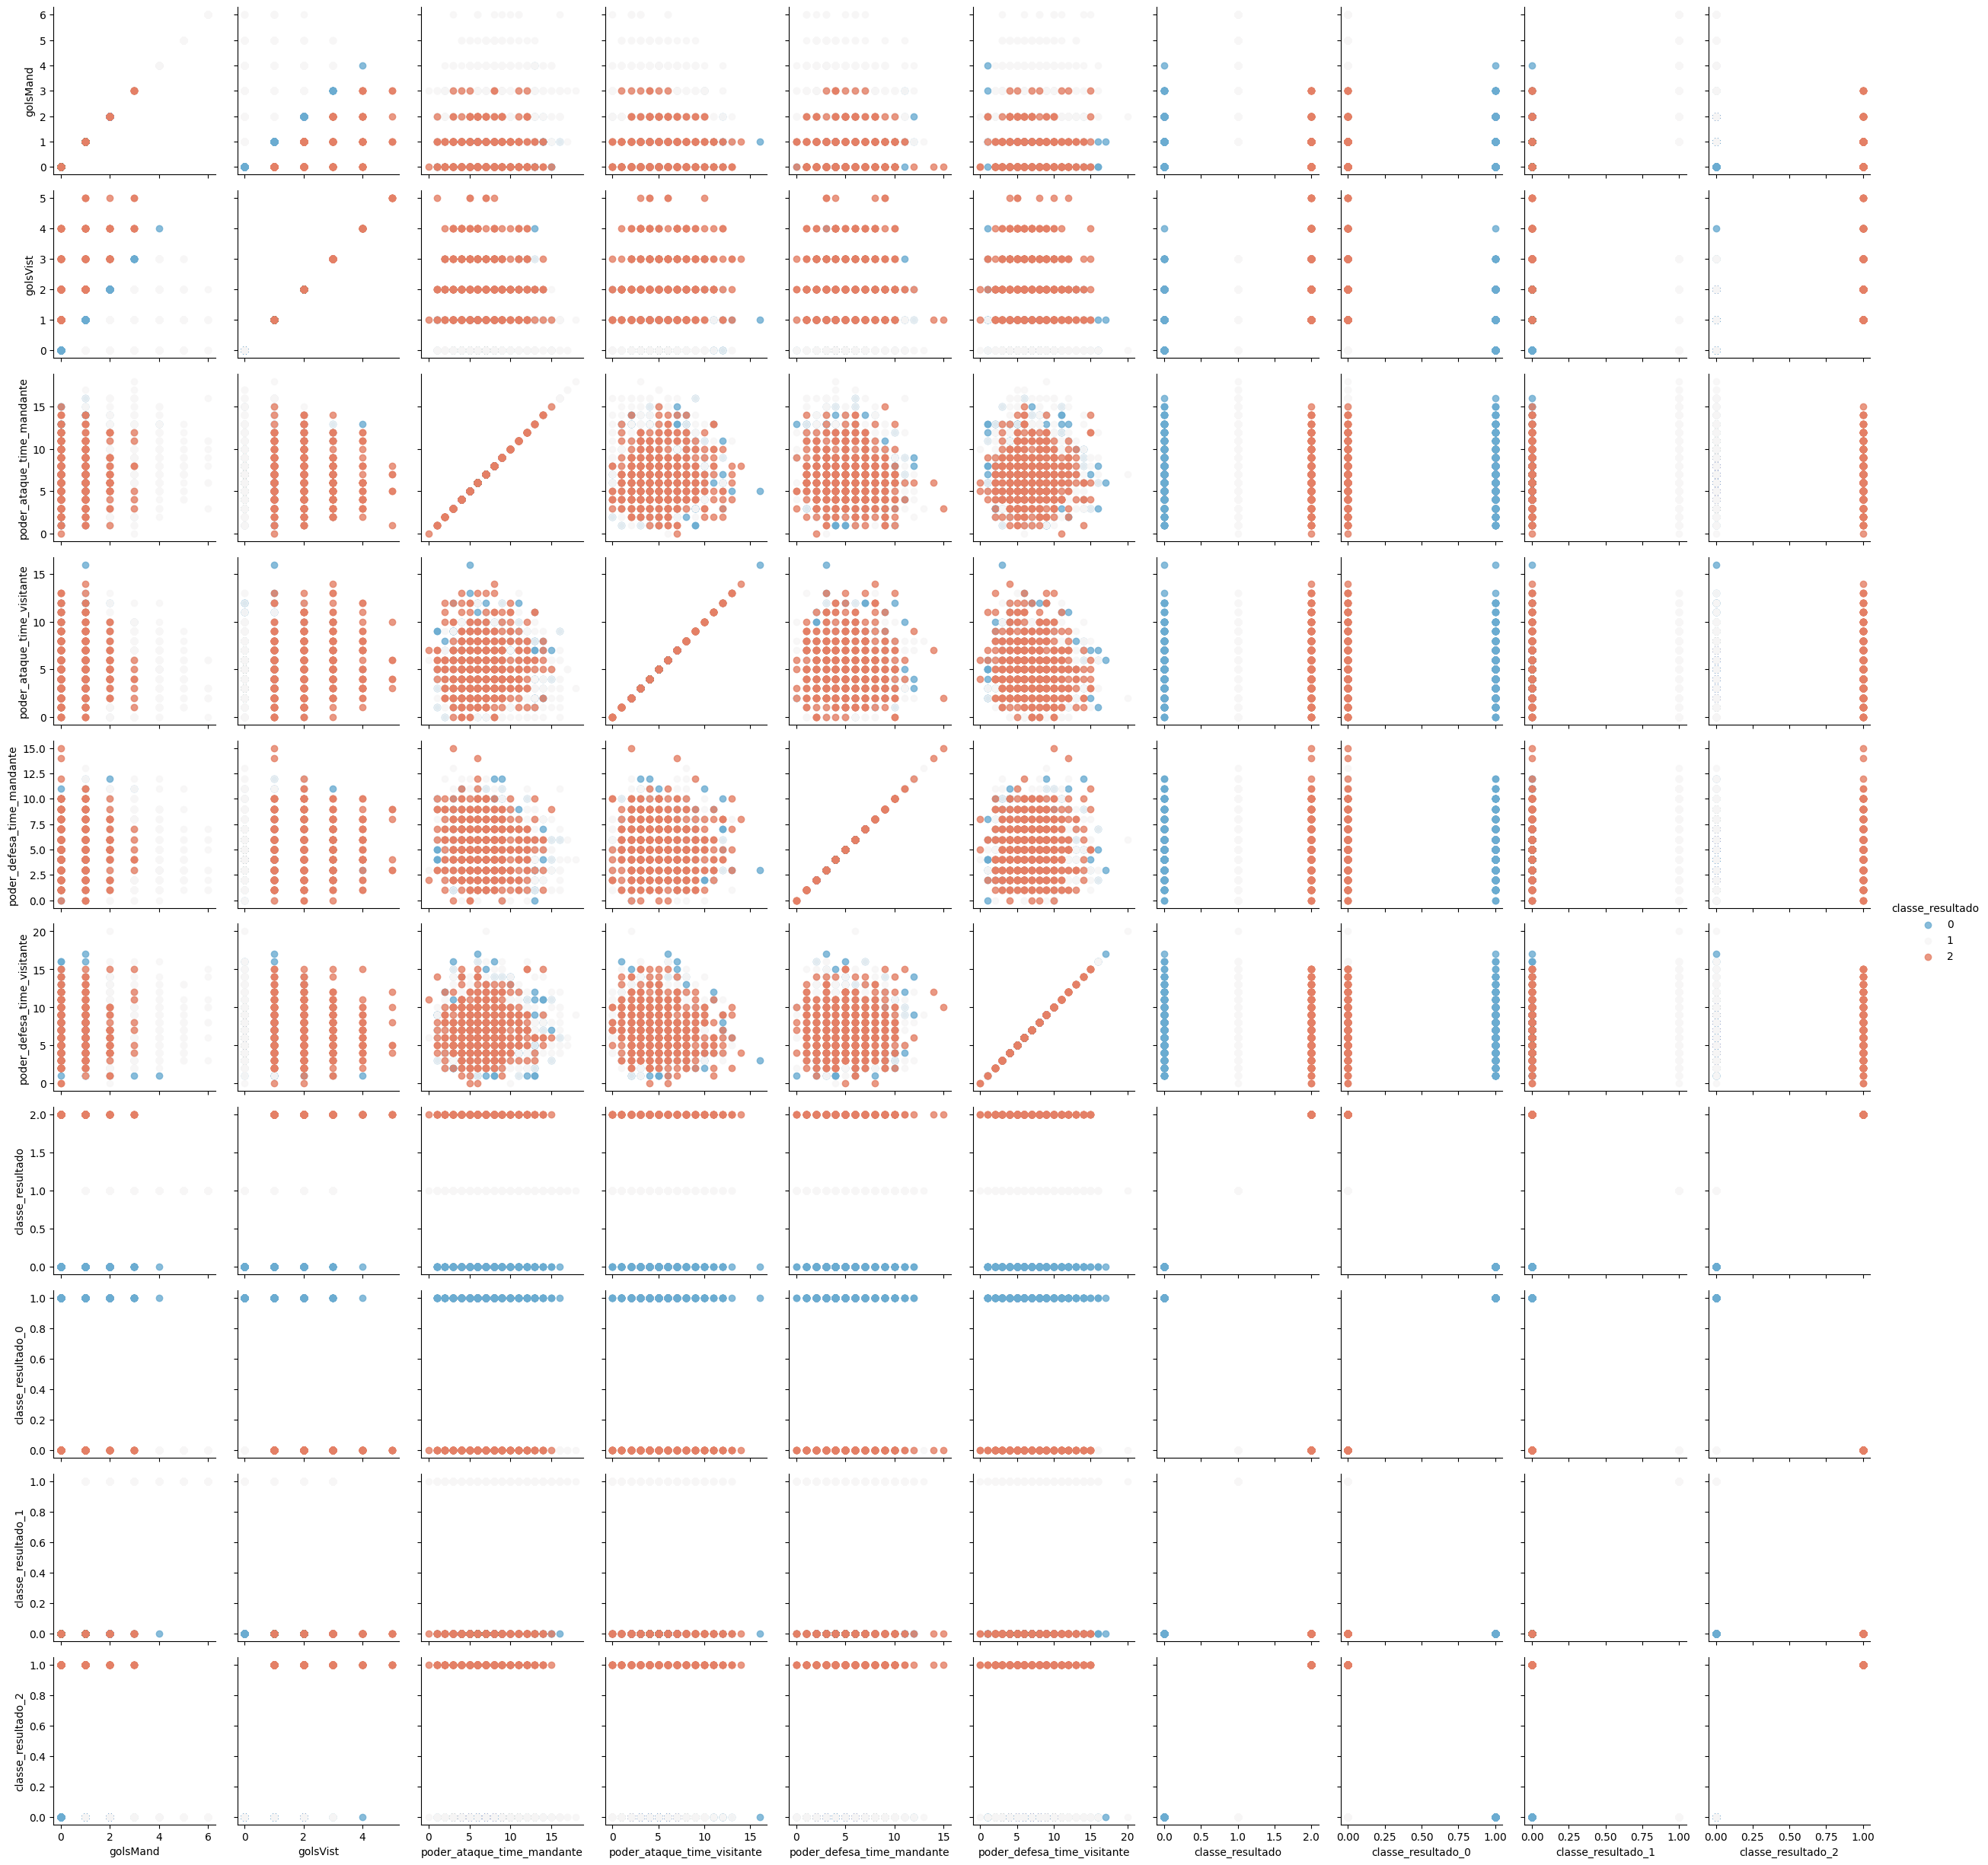

In [ ]:
# scatter plot
g = sns.PairGrid(DataFrame_Geral, vars=['golsMand', 'golsVist', 'poder_ataque_time_mandante', 'poder_ataque_time_visitante',
                                        'poder_defesa_time_mandante',	'poder_defesa_time_visitante',	'classe_resultado',
                                        'classe_resultado_0',	'classe_resultado_1',	'classe_resultado_2'],
                 hue='classe_resultado', palette='BRdu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

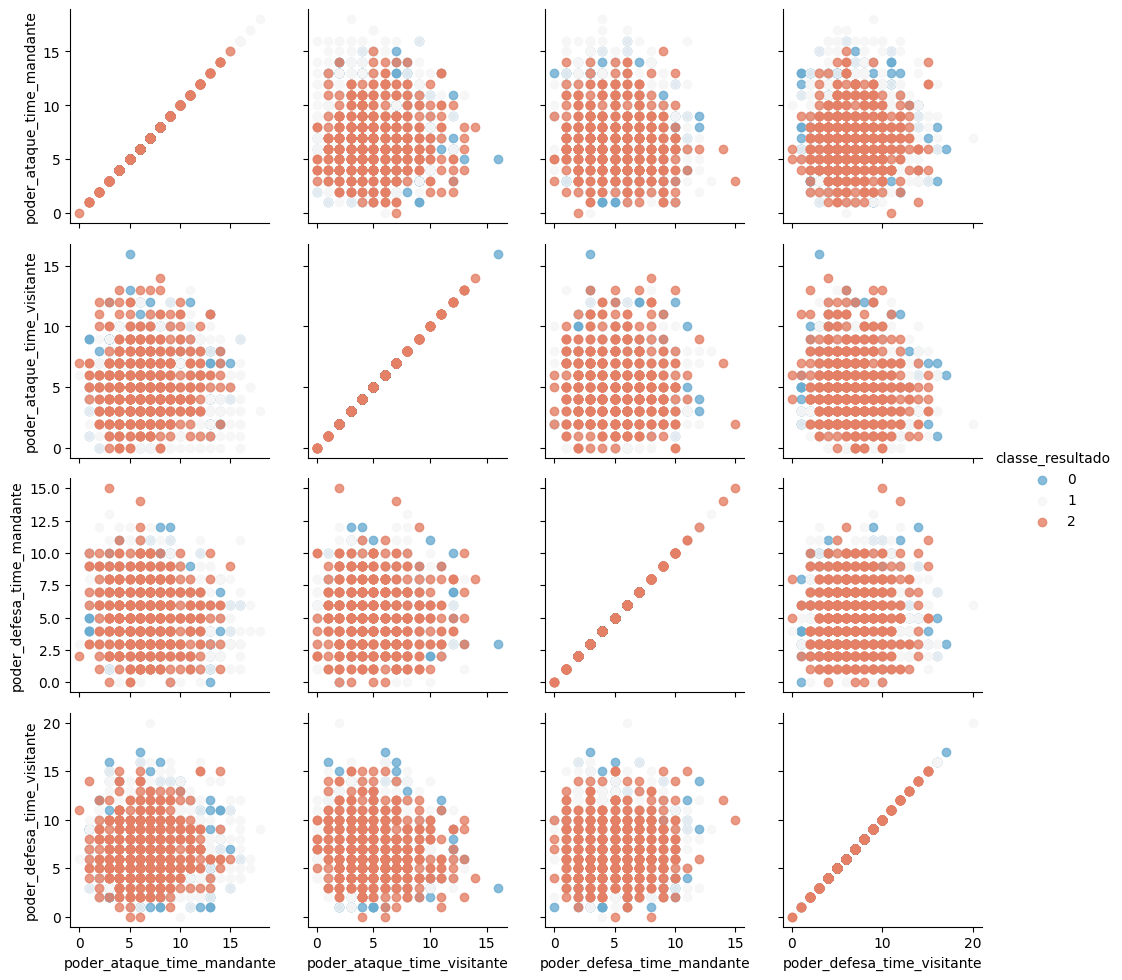

In [ ]:
g = sns.PairGrid(DataFrame_Geral, vars=['poder_ataque_time_mandante', 'poder_ataque_time_visitante',
                                        'poder_defesa_time_mandante',	'poder_defesa_time_visitante'],
                 hue='classe_resultado', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

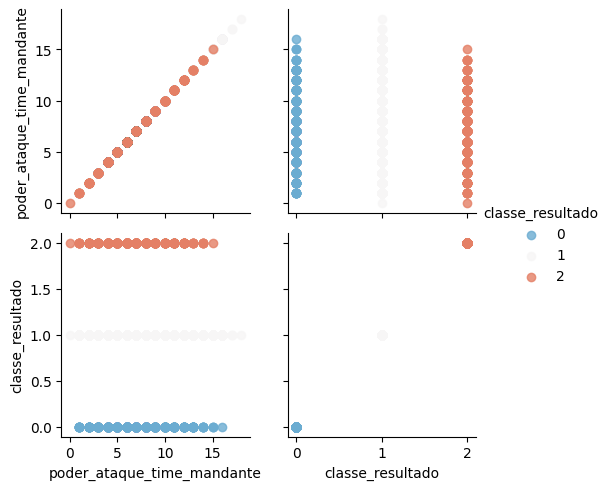

In [ ]:
g = sns.PairGrid(DataFrame_Geral, vars=['poder_ataque_time_mandante', 'classe_resultado'],
                 hue='classe_resultado', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

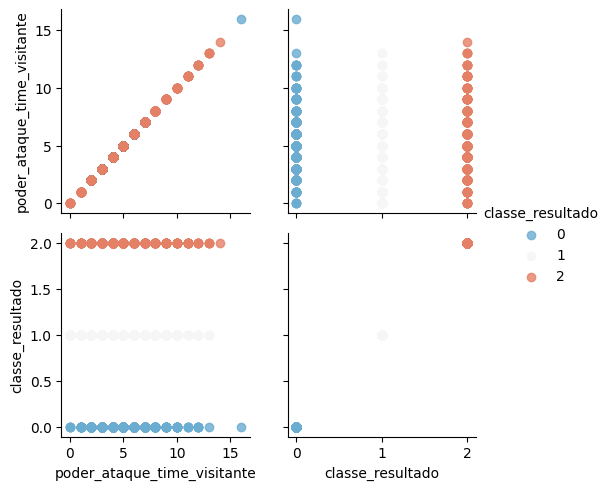

In [ ]:
g = sns.PairGrid(DataFrame_Geral, vars=['poder_ataque_time_visitante', 'classe_resultado'],
                 hue='classe_resultado', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

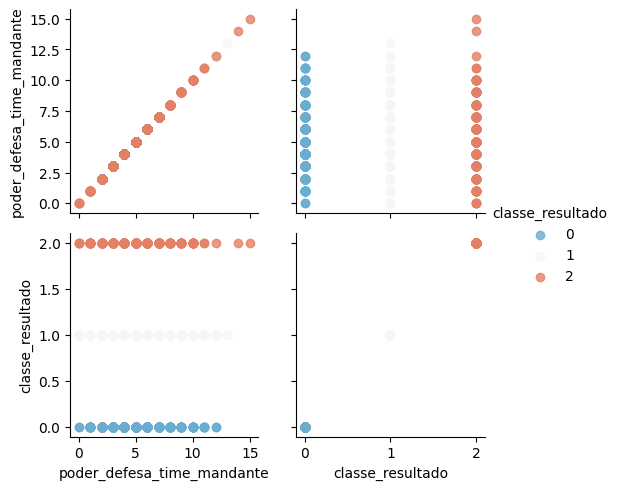

In [ ]:
g = sns.PairGrid(DataFrame_Geral, vars=['poder_defesa_time_mandante', 'classe_resultado'],
                 hue='classe_resultado', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

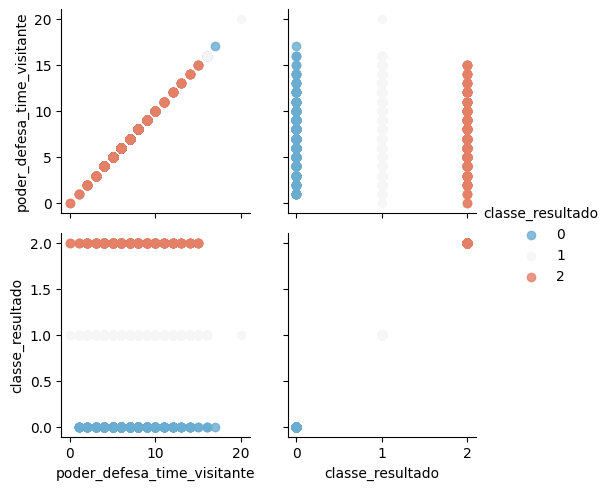

In [ ]:
g = sns.PairGrid(DataFrame_Geral, vars=['poder_defesa_time_visitante', 'classe_resultado'],
                 hue='classe_resultado', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

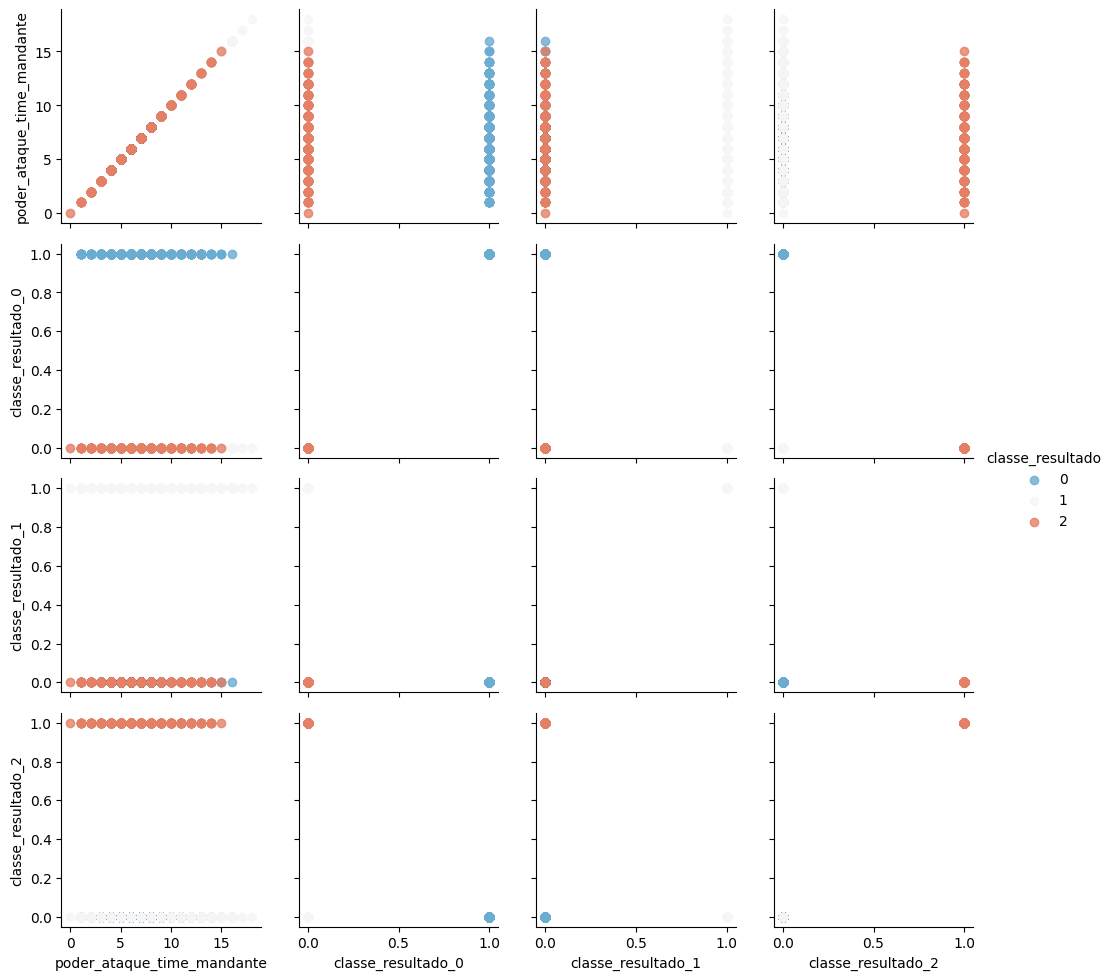

In [ ]:
g = sns.PairGrid(DataFrame_Geral, vars=['poder_ataque_time_mandante', 'classe_resultado_0',	'classe_resultado_1',	'classe_resultado_2'],
                 hue='classe_resultado', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

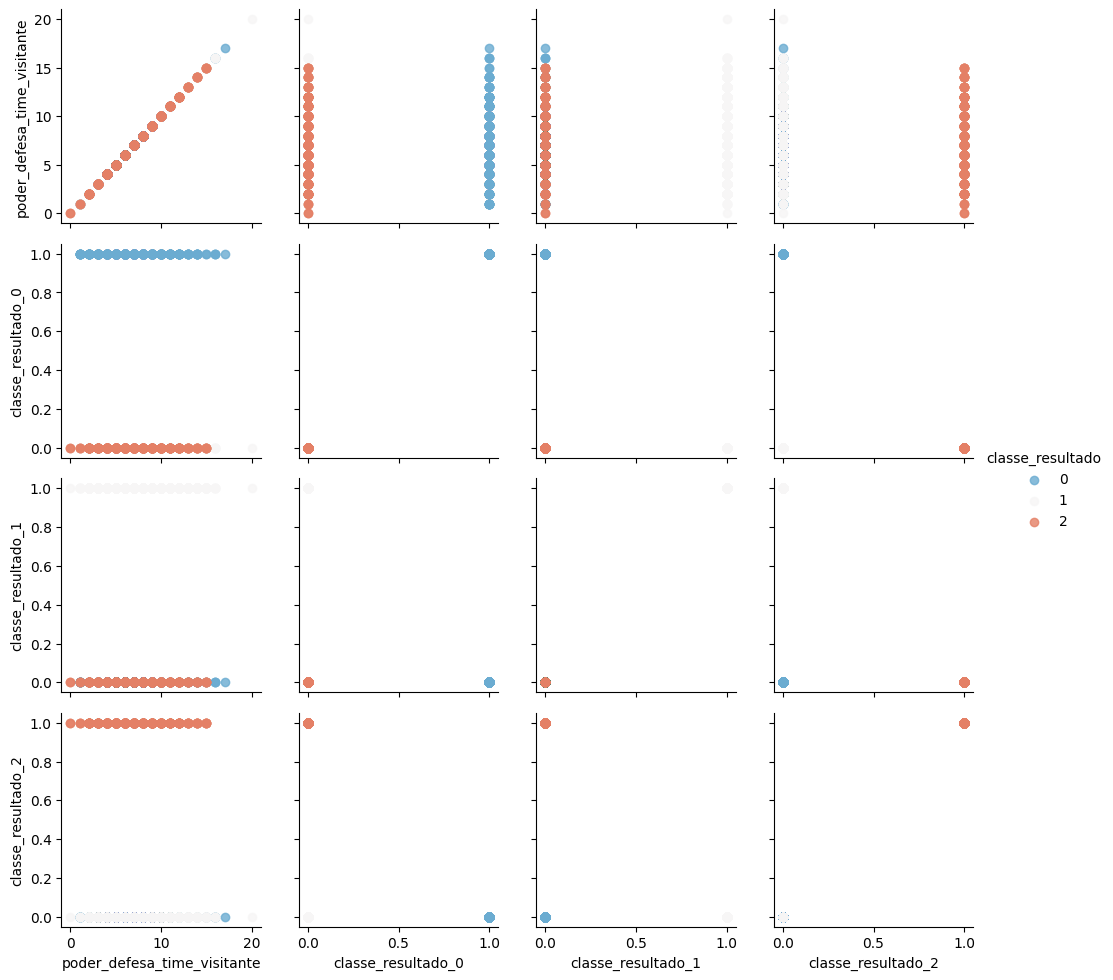

In [ ]:
g = sns.PairGrid(DataFrame_Geral, vars=['poder_defesa_time_visitante', 'classe_resultado_0',	'classe_resultado_1',	'classe_resultado_2'],
                 hue='classe_resultado', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

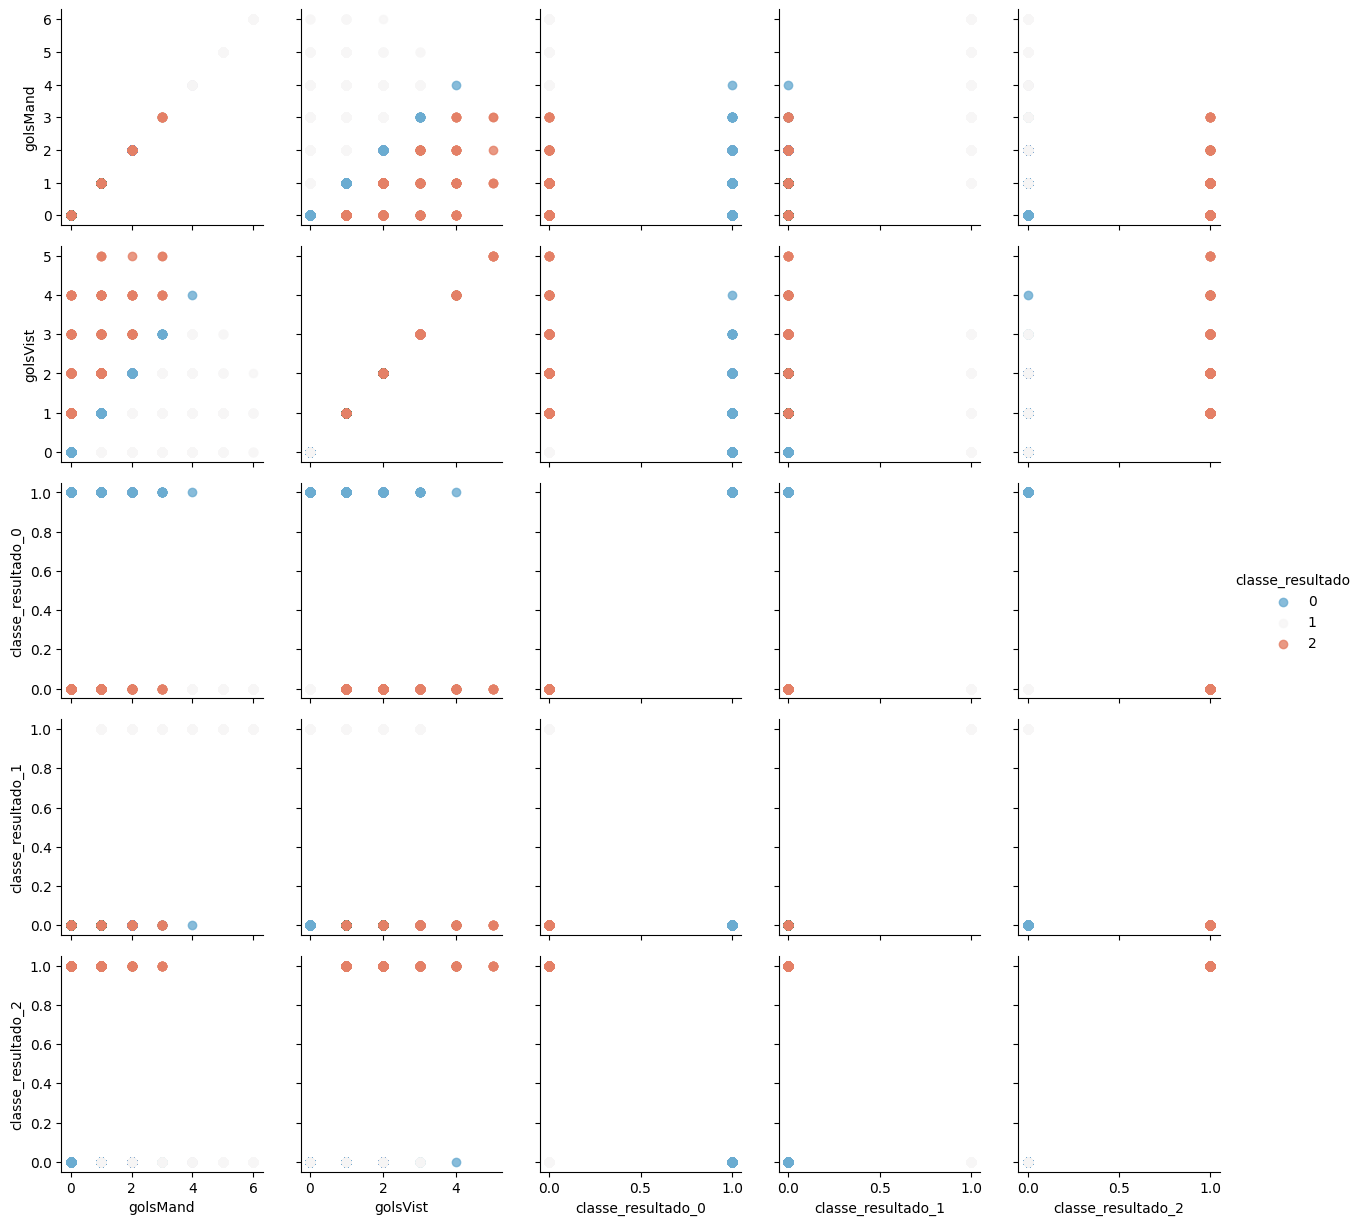

In [ ]:
g = sns.PairGrid(DataFrame_Geral, vars=['golsMand', 'golsVist', 'classe_resultado_0',	'classe_resultado_1',	'classe_resultado_2'],
                 hue='classe_resultado', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [ ]:
# g = sns.PairGrid(DataFrame_Geral, vars=['golsMand', 'golsVist', 'poder_ataque_time_mandante', 'poder_ataque_time_visitante',
#                                         'poder_defesa_time_mandante',	'poder_defesa_time_visitante',	'classe_resultado',
#                                         'classe_resultado_0',	'classe_resultado_1',	'classe_resultado_2'],
#                  hue='classe_resultado', palette='RdBu_r')
# g.map(plt.scatter, alpha=0.8)
# g.add_legend();